# 6.2 Exploring Relationships

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version

matplotlib.__version__

'3.5.2'

In [3]:
# Ensure charts are displayed without having to call them specifically

%matplotlib inline

### Importing Data

In [4]:
# folder path
path = r'C:\Users\jpelc\Documents\07-2023 UFC-Fight historical data'
# Importing orders.csv 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_data_clean.csv'))

### Cleaning data

In [5]:
df.head()

,Unnamed: 0,R_fighter,B_fighter,R_Knockdown,B_Knockdown,R_Significant_Strikes,B_Significant_Strikes,R_Significant_Strike_Percent,B_Significant_Strike_Percent,R_Total_Strikes,...,R_Ground_Control,B_Ground_Control,R_Ground_Strikes,B_Ground_Strikes,win_by,No_of_rounds,date,location,fight_type,Winner
0,0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,...,0:03,0:00,0 of 1,0 of 0,KO/TKO,3,2021-03-20,Las Vegas Nevada USA,Bantamweight Bout,Adrian Yanez
1,1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,...,1:15,4:15,8 of 10,1 of 2,Decision - Unanimous,3,2021-03-20,Las Vegas Nevada USA,Middleweight Bout,Trevin Giles
2,2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,...,0:10,0:00,5 of 8,0 of 0,KO/TKO,3,2021-03-20,Las Vegas Nevada USA,Heavyweight Bout,Tai Tuivasa
3,3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,...,1:04,9:53,3 of 7,0 of 0,Decision - Unanimous,3,2021-03-20,Las Vegas Nevada USA,Women's Strawweight Bout,Montserrat Conejo
4,4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,...,2:15,3:48,0 of 0,2 of 4,Decision - Unanimous,3,2021-03-20,Las Vegas Nevada USA,Women's Bantamweight Bout,Macy Chiasson


In [6]:
#remove unamed columns
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.shape

(5758, 26)

In [8]:
# Dividing Significant strikes, Total strikes, and Ground strikes 


df[['R_Significant_Strikes_Landed', 'R_Significant_Strikes_Attempted']] = df['R_Significant_Strikes'].str.split(' of ', expand=True)
df[['B_Significant_Strikes_Landed', 'B_Significant_Strikes_Attempted']] = df['B_Significant_Strikes'].str.split(' of ', expand=True)
df[['R_Total_Strikes_Landed', 'R_Total_Strikes_Attempted']] = df['R_Total_Strikes'].str.split(' of ', expand=True)
df[['B_Total_Strikes_Landed', 'B_Total_Strikes_Attempted']] = df['B_Total_Strikes'].str.split(' of ', expand=True)
df[['R_Takedowns_Landed', 'R_Takedowns_Attempted']] = df['R_Takedowns'].str.split(' of ', expand=True)
df[['B_Takedowns_Landed', 'B_Takedowns_Attempted']] = df['B_Takedowns'].str.split(' of ', expand=True)
df[['R_Ground_Strikes_Landed', 'R_Ground_Strikes_Attempted']] = df['R_Ground_Strikes'].str.split(' of ', expand=True)
df[['B_Ground_Strikes_Landed', 'B_Ground_Strikes_Attempted']] = df['B_Ground_Strikes'].str.split(' of ', expand=True)

to_drop = ['R_Significant_Strikes','B_Significant_Strikes','R_Takedowns','B_Takedowns','R_Ground_Strikes','B_Ground_Strikes','R_Total_Strikes','B_Total_Strikes']
df = df.drop(to_drop, axis=1)

In [9]:
# Removing % symbol form the percentage columns

df['R_Significant_Strike_Percent'] = df['R_Significant_Strike_Percent'].str.replace('%', '')
df['B_Significant_Strike_Percent'] = df['B_Significant_Strike_Percent'].str.replace('%', '')
df['R_Takedown_Percent'] = df['R_Takedown_Percent'].str.replace('%', '')
df['B_Takedown_Percent'] = df['B_Takedown_Percent'].str.replace('%', '')

In [10]:
# Changing '---' to '0' in the percentage columns

df['R_Significant_Strike_Percent'] = df['R_Significant_Strike_Percent'].str.replace('---', '0')
df['B_Significant_Strike_Percent'] = df['B_Significant_Strike_Percent'].str.replace('---', '0')
df['R_Takedown_Percent'] = df['R_Takedown_Percent'].str.replace('---', '0')
df['B_Takedown_Percent'] = df['B_Takedown_Percent'].str.replace('---', '0')

In [11]:
df.shape

(5758, 34)

In [12]:
# Verifying data types
df.dtypes

R_fighter                          object
B_fighter                          object
R_Knockdown                         int64
B_Knockdown                         int64
R_Significant_Strike_Percent       object
B_Significant_Strike_Percent       object
R_Takedown_Percent                 object
B_Takedown_Percent                 object
R_Submission_Attempt                int64
B_Submission_Attempt                int64
R_Ground_Control                   object
B_Ground_Control                   object
win_by                             object
No_of_rounds                        int64
date                               object
location                           object
fight_type                         object
Winner                             object
R_Significant_Strikes_Landed       object
R_Significant_Strikes_Attempted    object
B_Significant_Strikes_Landed       object
B_Significant_Strikes_Attempted    object
R_Total_Strikes_Landed             object
R_Total_Strikes_Attempted         

In [13]:
#Converting colums to int64
columns_to_convert = ['R_Significant_Strikes_Landed', 'R_Significant_Strikes_Attempted','B_Significant_Strikes_Landed',
             'B_Significant_Strikes_Attempted', 'R_Total_Strikes_Landed', 'R_Total_Strikes_Attempted', 
             'B_Total_Strikes_Landed', 'B_Total_Strikes_Attempted','R_Takedowns_Landed', 'R_Takedowns_Attempted', 
             'B_Takedowns_Landed', 'B_Takedowns_Attempted', 'R_Ground_Strikes_Landed', 'R_Ground_Strikes_Attempted',
             'B_Ground_Strikes_Landed', 'B_Ground_Strikes_Attempted', 'R_Significant_Strike_Percent', 
             'B_Significant_Strike_Percent', 'R_Takedown_Percent', 'B_Takedown_Percent']

df[columns_to_convert] = df[columns_to_convert].astype('int64')

### Creating Subset

In [14]:
#Creating a subset for Red fighter
R_subset = ['R_fighter','R_Knockdown','R_Significant_Strike_Percent','R_Takedown_Percent',
            'R_Submission_Attempt','R_Ground_Control', 'win_by', 'No_of_rounds', 'date', 'fight_type',
            'R_Significant_Strikes_Landed', 'R_Significant_Strikes_Attempted', 'R_Total_Strikes_Landed', 
            'R_Total_Strikes_Attempted', 'R_Takedowns_Landed', 'R_Takedowns_Attempted', 
            'R_Ground_Strikes_Landed','Winner']
R_df = df[R_subset]
R_df = R_df.rename(columns=lambda x: x.replace('R_', ''))
R_df['Winner'] = np.where(R_df['Winner'] == R_df['fighter'], 1, 0)
R_df.head()

,fighter,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Ground_Control,win_by,No_of_rounds,date,fight_type,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner
0,Adrian Yanez,2,39,0,0,0:03,KO/TKO,3,2021-03-20,Bantamweight Bout,41,103,41,103,0,0,0,1
1,Trevin Giles,0,47,50,1,1:15,Decision - Unanimous,3,2021-03-20,Middleweight Bout,27,57,43,73,1,2,8,1
2,Tai Tuivasa,1,77,0,0,0:10,KO/TKO,3,2021-03-20,Heavyweight Bout,14,18,14,18,0,0,5,1
3,Cheyanne Buys,0,47,0,0,1:04,Decision - Unanimous,3,2021-03-20,Women's Strawweight Bout,31,65,49,87,0,0,3,0
4,Marion Reneau,0,47,50,0,2:15,Decision - Unanimous,3,2021-03-20,Women's Bantamweight Bout,30,63,59,93,2,4,0,0


In [15]:
#Creating a subset for Blue fighter
B_subset = ['B_fighter', 'B_Knockdown', 'B_Significant_Strike_Percent', 'B_Takedown_Percent', 'B_Submission_Attempt',
            'B_Ground_Control', 'win_by', 'No_of_rounds', 'date', 'fight_type', 'B_Significant_Strikes_Landed',
            'B_Significant_Strikes_Attempted', 'B_Total_Strikes_Landed', 'B_Total_Strikes_Attempted', 
            'B_Takedowns_Landed', 'B_Takedowns_Attempted', 'B_Ground_Strikes_Landed', 'Winner']
B_df = df[B_subset]
B_df = B_df.rename(columns=lambda x: x.replace('B_', ''))
B_df['Winner'] = np.where(B_df['Winner'] == B_df['fighter'], 1, 0)
B_df.head()

,fighter,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Ground_Control,win_by,No_of_rounds,date,fight_type,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner
0,Gustavo Lopez,0,45,0,0,0:00,KO/TKO,3,2021-03-20,Bantamweight Bout,23,51,23,51,0,1,0,0
1,Roman Dolidze,0,47,33,2,4:15,Decision - Unanimous,3,2021-03-20,Middleweight Bout,32,67,75,110,1,3,1,0
2,Harry Hunsucker,0,33,0,0,0:00,KO/TKO,3,2021-03-20,Heavyweight Bout,2,6,2,6,0,0,0,0
3,Montserrat Conejo,0,36,80,2,9:53,Decision - Unanimous,3,2021-03-20,Women's Strawweight Bout,15,41,136,168,4,5,0,1
4,Macy Chiasson,0,36,100,0,3:48,Decision - Unanimous,3,2021-03-20,Women's Bantamweight Bout,51,138,92,184,1,1,2,1


In [16]:
#Creating new df with both subsets
new_df = pd.concat([R_df, B_df])

# sort the combined dataframe by date
ufc = new_df.sort_values(by='date', ascending=False)
# reset the index
ufc = ufc.reset_index(drop=True)

In [17]:
#Creating a subset out of new df
ufc_sub =ufc[['Knockdown', 'Significant_Strike_Percent','Takedown_Percent', 
             'Submission_Attempt', 'Significant_Strikes_Landed','Significant_Strikes_Attempted', 
             'Total_Strikes_Landed','Total_Strikes_Attempted', 'Takedowns_Landed', 'Takedowns_Attempted',
             'Ground_Strikes_Landed', 'Winner']]

In [18]:
ufc_sub.head()

,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner
0,2,39,0,0,41,103,41,103,0,0,0,1
1,0,47,50,1,27,57,43,73,1,2,8,1
2,0,30,0,1,17,56,37,76,0,1,0,0
3,0,56,0,0,14,25,14,25,0,0,2,0
4,0,48,100,0,36,74,190,236,1,1,2,0


In [19]:
ufc_sub.shape

(11516, 12)

### Exploring Relationships

In [20]:
#Creating Correlation Matrix
ufc_sub.corr()

,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner
Knockdown,1.000000,0.167871,-0.061744,-0.071116,0.048191,-0.001090,-0.029801,-0.041767,-0.120603,-0.167764,0.085715,0.311956
Significant_Strike_Percent,0.167871,1.000000,0.171543,0.084673,0.150482,-0.110408,0.217266,-0.028569,0.142803,0.031689,0.350598,0.328146
Takedown_Percent,-0.061744,0.171543,1.000000,0.196620,0.068394,-0.000214,0.207494,0.103508,0.587922,0.230235,0.334974,0.238964
Submission_Attempt,-0.071116,0.084673,0.196620,1.000000,-0.084776,-0.122228,0.042829,-0.044325,0.156985,0.082076,0.139374,0.161760
Significant_Strikes_Landed,0.048191,0.150482,0.068394,-0.084776,1.000000,0.915099,0.817032,0.888502,0.135592,0.176783,0.251446,0.242605
Significant_Strikes_Attempted,-0.001090,-0.110408,-0.000214,-0.122228,0.915099,1.000000,0.700183,0.928454,0.070709,0.166206,0.087209,0.130547
Total_Strikes_Landed,-0.029801,0.217266,0.207494,0.042829,0.817032,0.700183,1.000000,0.893341,0.342698,0.319877,0.458333,0.277270
Total_Strikes_Attempted,-0.041767,-0.028569,0.103508,-0.044325,0.888502,0.928454,0.893341,1.000000,0.224684,0.276140,0.258922,0.186169
Takedowns_Landed,-0.120603,0.142803,0.587922,0.156985,0.135592,0.070709,0.342698,0.224684,1.000000,0.736656,0.392971,0.239101
Takedowns_Attempted,-0.167764,0.031689,0.230235,0.082076,0.176783,0.166206,0.319877,0.276140,0.736656,1.000000,0.211287,0.089319


## 3. Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

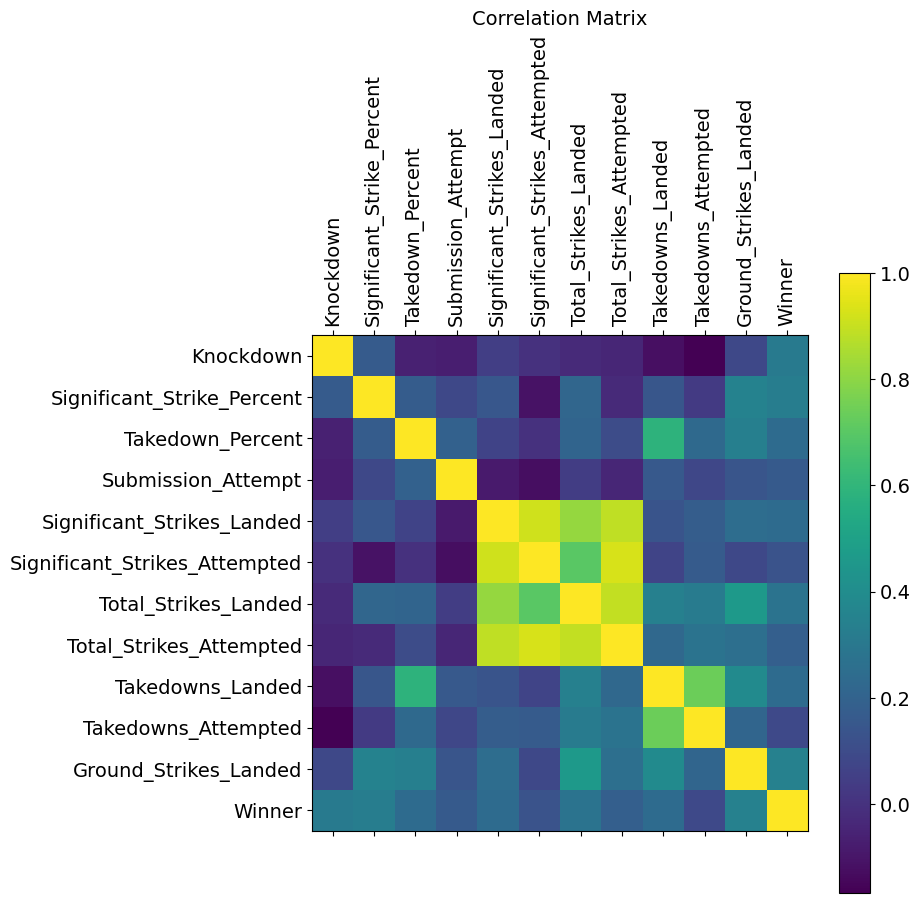

In [21]:
# Creating a correlation heatmap

corr_figure = plt.figure(figsize=(8, 8)) # Size of the figure
plt.matshow(ufc_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap
plt.xticks(range(ufc_sub.shape[1]), ufc_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(ufc_sub.shape[1]), ufc_sub.columns, fontsize=14) # y axis labels
corr_cb = plt.colorbar() # add a colorbar
corr_cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Correlation heatmap

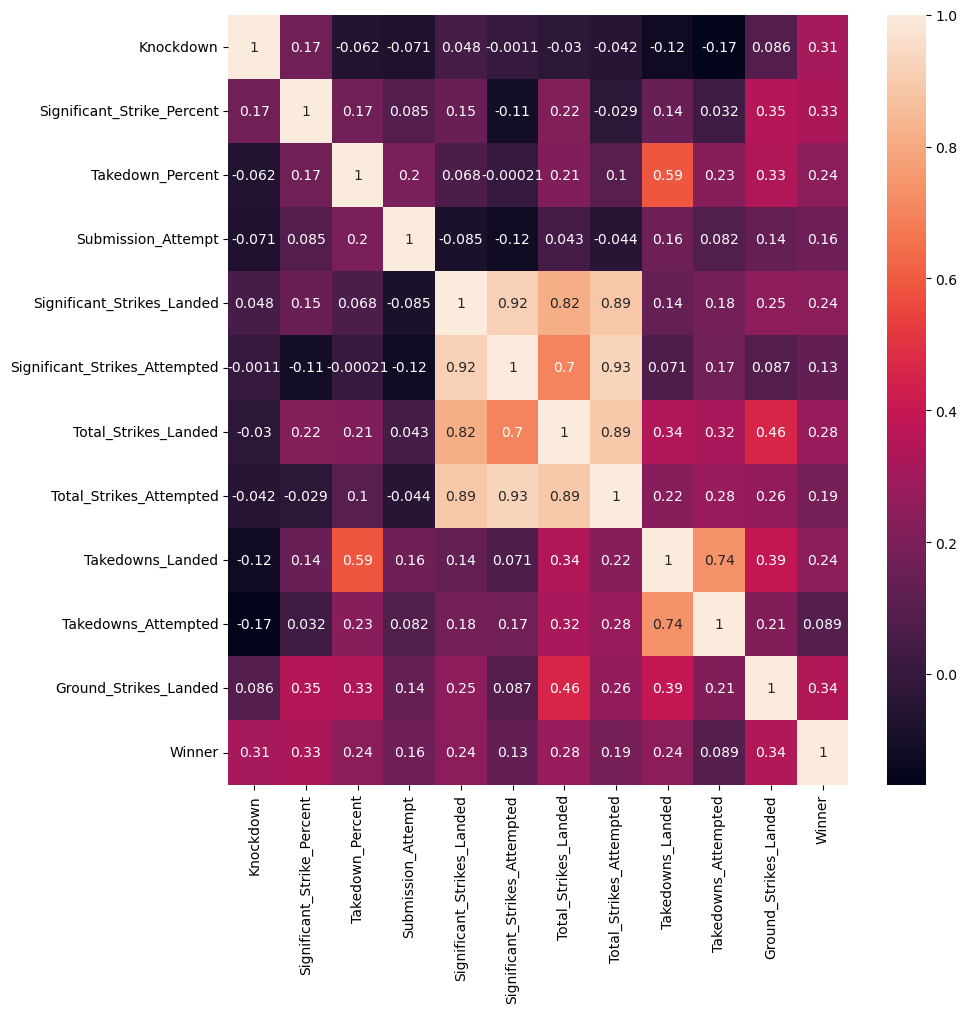

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(ufc_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

**Strongest corralations:**

**Winner** with:
    Knockdown, Significant_Strikes_Percent, Ground_Strikes_Landed

**Ground_Strikes_Landed with:**
    Total_Strikes_Landed, Takedowns_Landed, Significant_Strikes_Percent, Takedown_Percent, Winner

**Takedowns_Attempted**
    Takedowns_Landed, Total_Strikes_Landed

**Takedowns_Landed with:**
    Takedowns_Attempted, Takedown_Percent, Total_Strikes_Landed

**Total_Strikes_Attempted with:**
    Total_Strikes_Landed, Significant_Strikes_Percent, Significant_Strikes_Attempted
   
**Total_Strikes_Landed with:**
    Total_Strikes_Attempted, Significant_Strikes_Percent, Significant_Strikes_Attempted, 
    Takedowns_Attempted, Takedowns_Landed, Ground_Strikes_Landed
    
**Significant_Strike_Attempted with:**
    Total_Strikes_Attempted, Significant_Strikes_Landed, Total_Strikes_Landed, Significant_Strikes

**Significant_Strike_Landed with:**
    Total_Strikes_Attempted, Significant_Strikes_Attempted, Total_Strikes_Landed, Significant_Strikes
    
**Takedown_Percent with:**
    Takedowns_Landed, Significant_Strikes_Percent
    
**Significant_Strike_Percent with:**
    Ground_Strikes_Landed, Winner

**Knockdown with:**
    Winner

The strongest correlations where all between the variables that had to do with Attempt’s, Landed and Percentage. These variables are clearly connected since each one affects the next.

A few weaker correlations that stand out are with the **Winner** column.

## Scatterplots

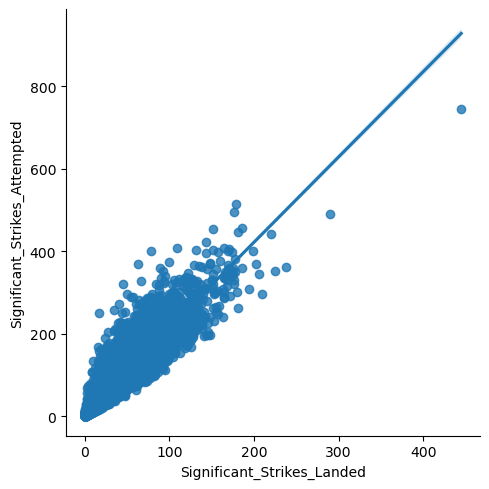

In [23]:
# Look at the correlation between Significant_Strikes_Landed and Significant_Strikes_Attempted

scatter_SSL_SSA = sns.lmplot(x = 'Significant_Strikes_Landed', y = 'Significant_Strikes_Attempted', data = ufc_sub)

The scatterplot shows an upward trend with some outliners. The correlation looks strong, suggesting that most fighters are accurate strikers, it can be inferred that the more attempts you make the more strikes you will land.

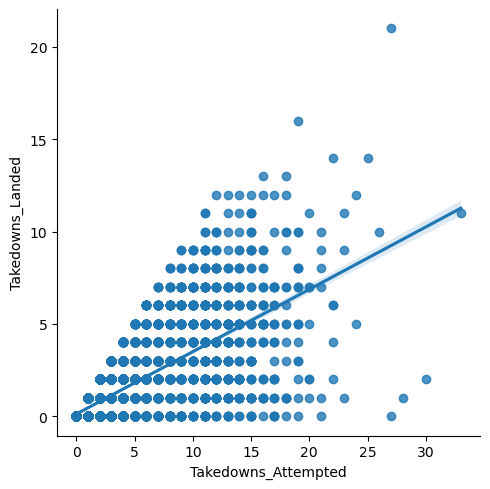

In [24]:
# Look at the correlation between Takedowns_Attempted and Takedowns_Landed

scatter_TA_TL = sns.lmplot(x = 'Takedowns_Attempted', y = 'Takedowns_Landed', data = ufc_sub)

The Takedown scatterplot does show an upward trend, but it has many outliners in each direction. The strength between attempting and landing is not very strong in one direction, meaning Takedowns are harder to come by than strikes, and some fighters attempt many, and land none.

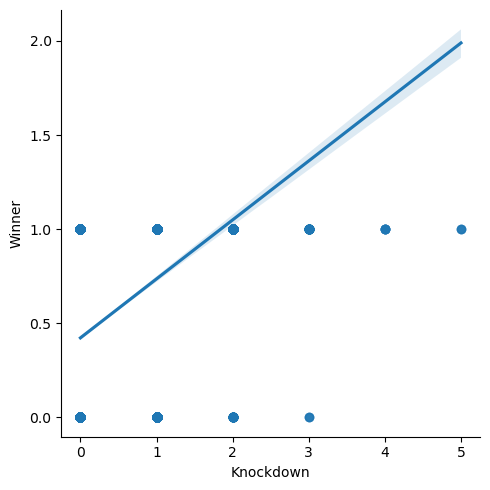

In [25]:
# Look at the correlation between Knockdown and Winner

scatter_K_W = sns.lmplot(x = 'Knockdown', y = 'Winner', data = ufc_sub)

The scatterplot shows an upward trend. The Winner column only has two values, win or lose, which means that the data does not give much insight. But some can still be obtained from viewing it. This graph shows us that every fighter with over 3 Knockdowns has won 100% of the times.

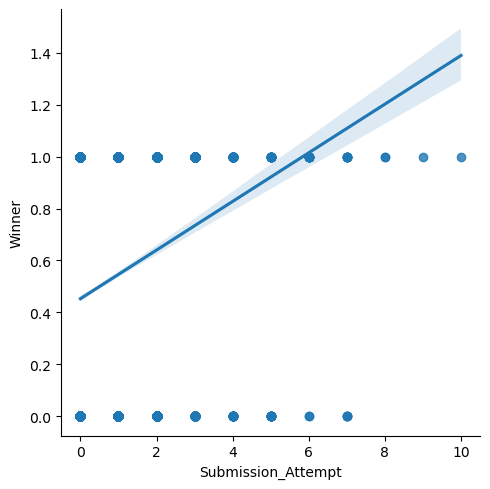

In [26]:
# Look at the correlation between Submission_Attempt and Winner

scatter_SA_W = sns.lmplot(x = 'Submission_Attempt', y = 'Winner', data = ufc_sub)

The scatterplot shows an upward trend. As with Knockdowns, Submission attempts shows that every fighter with over 7 submission attempts has won the fight.

## Pair Plots

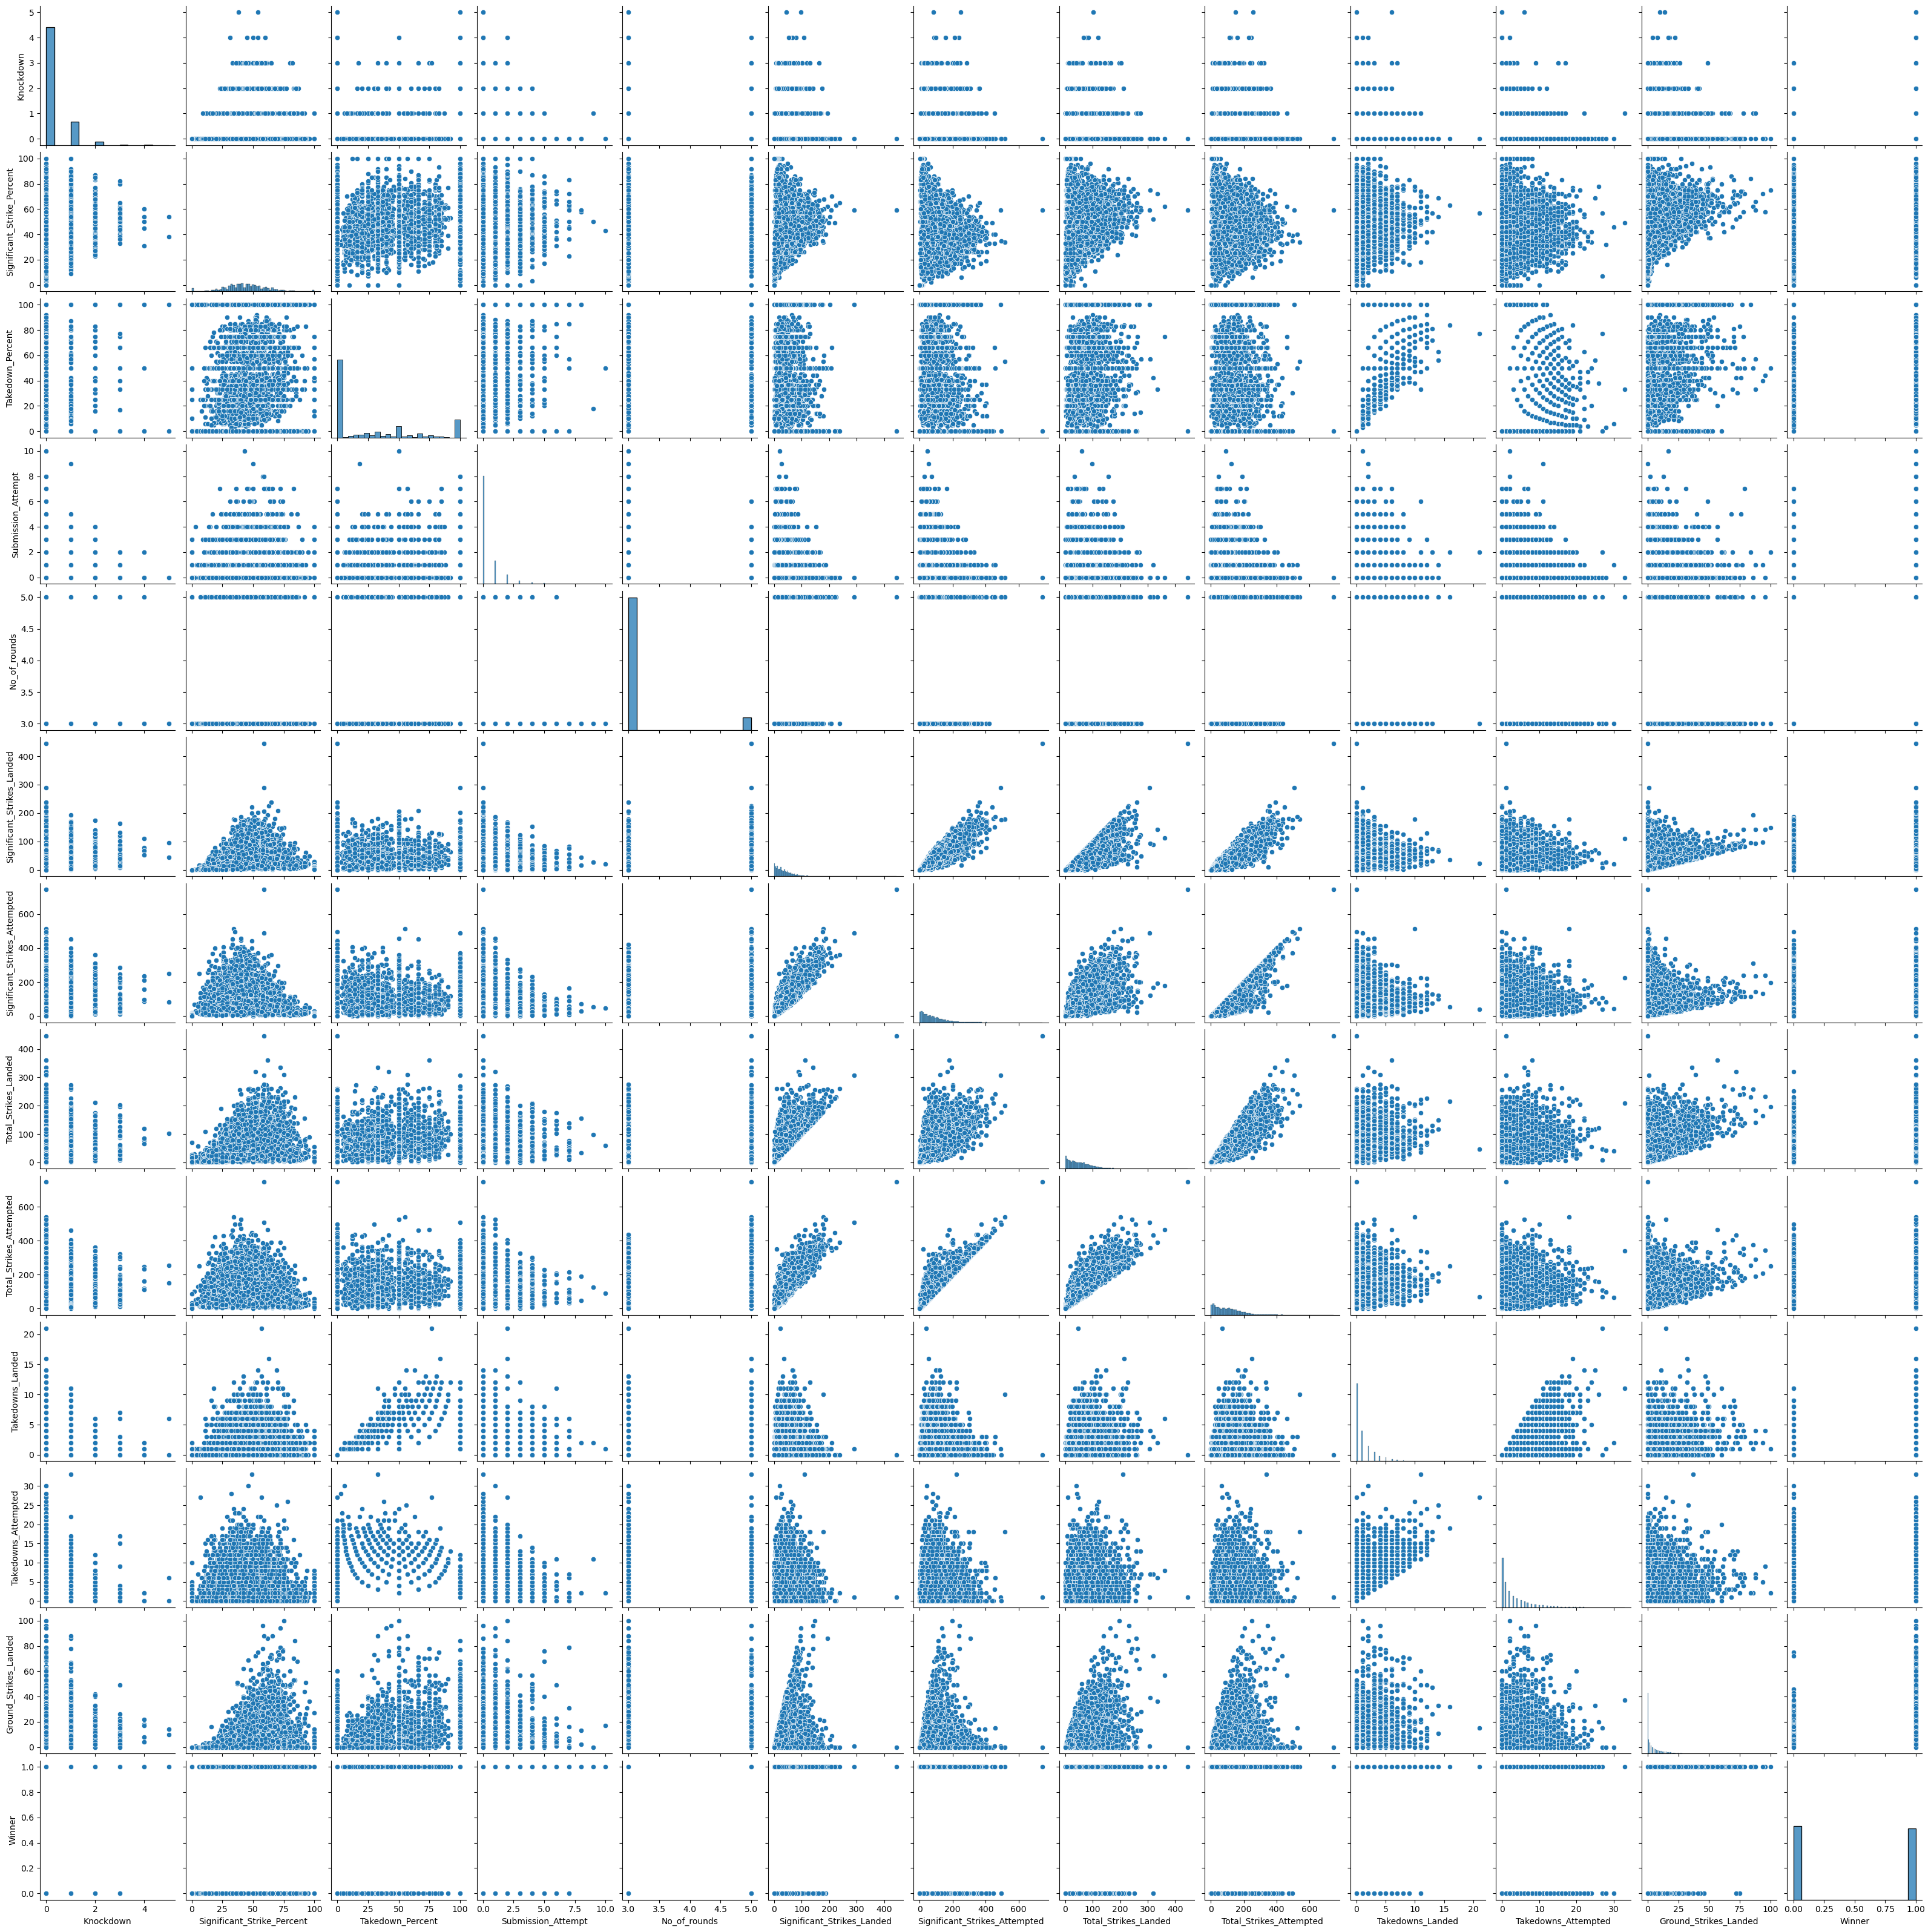

In [27]:
# Creating a pair plot of the entire dataset

pair = sns.pairplot(ufc)

Variable to explore:

    Total_Strikes_Attempted, high correlation variable that might gleam insight on the volume of strikes a fight had.
    

## Histogram

<AxesSubplot:xlabel='Total_Strikes_Attempted', ylabel='Count'>

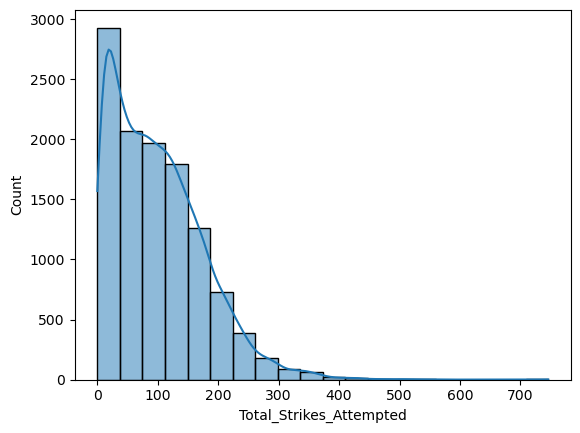

In [28]:
# Create a histogram for the population column

sns.histplot(ufc_sub['Total_Strikes_Attempted'], bins = 20, kde = True)

Most of the values are in the first half of the graph, will remove high outliners for better view.

In [29]:
ufc_histo = ufc_sub.loc[ufc_sub['Total_Strikes_Attempted'] < 500]

<AxesSubplot:xlabel='Total_Strikes_Attempted', ylabel='Count'>

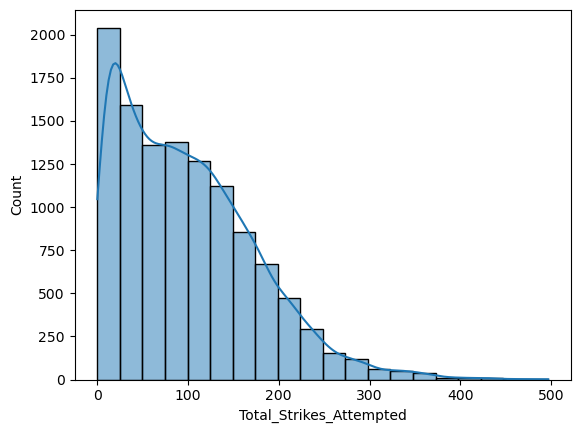

In [30]:
sns.histplot(ufc_histo['Total_Strikes_Attempted'], bins = 20, kde = True)

Many fights have ended before 25 strikes are attempted by a fighter.

The Attempts will be divided into categories:
    
    High Strike Fight if >= 200
    Moderate Strike Fight if >=100 and <200
    Low Strike Fight < 100


## Categorical Plots

In [31]:
# Create the first category

ufc_sub.loc[ufc_sub['Total_Strikes_Attempted'] < 100, 'Strike_Volume'] = 'Low'

C:\Users\jpelc\AppData\Local\Temp\ipykernel_19168\2067716284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_sub.loc[ufc_sub['Total_Strikes_Attempted'] < 100, 'Strike_Volume'] = 'Low'


In [32]:
# Create the Second category

ufc_sub.loc[(ufc_sub['Total_Strikes_Attempted'] >= 100) & (ufc_sub['Total_Strikes_Attempted'] < 200), 'Strike_Volume'] = 'Moderate'

In [33]:
# Create the first category

ufc_sub.loc[ufc_sub['Total_Strikes_Attempted'] >= 200, 'Strike_Volume'] = 'High'

In [34]:
# Check results
ufc_sub.head(10)

,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner,Strike_Volume
0,2,39,0,0,41,103,41,103,0,0,0,1,Moderate
1,0,47,50,1,27,57,43,73,1,2,8,1,Low
2,0,30,0,1,17,56,37,76,0,1,0,0,Low
3,0,56,0,0,14,25,14,25,0,0,2,0,Low
4,0,48,100,0,36,74,190,236,1,1,2,0,High
5,1,60,0,0,17,28,17,28,0,1,1,1,Low
6,0,54,7,0,46,84,75,132,1,13,4,1,Moderate
7,0,36,100,0,51,138,92,184,1,1,2,1,Moderate
8,0,36,80,2,15,41,136,168,4,5,0,1,Moderate
9,0,33,0,0,2,6,2,6,0,0,0,0,Low


In [35]:
# Checking the frequencies

ufc_sub['Strike_Volume'].value_counts(dropna = False)

Low         6372
Moderate    3937
High        1207
Name: Strike_Volume, dtype: int64

In [36]:
ufc_sub.columns

Index(['Knockdown', 'Significant_Strike_Percent', 'Takedown_Percent',
       'Submission_Attempt', 'Significant_Strikes_Landed',
       'Significant_Strikes_Attempted', 'Total_Strikes_Landed',
       'Total_Strikes_Attempted', 'Takedowns_Landed', 'Takedowns_Attempted',
       'Ground_Strikes_Landed', 'Winner', 'Strike_Volume'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using the Strike_Volume categories created above

sns.set(style="ticks")
categorical = sns.catplot(x="Total_Strikes_Landed", y="Total_Strikes_Attempted", hue="Strike_Volume", data=ufc_sub)

## Insights from analysis

There is a high correlation between strikes attempted and strikes landed.

There is a low correlation between takedowns attempted and takedowns landed. Suggesting they are harder to come by.

Every fighter with more than 3 knockdowns in a fight has won every time.

Every fighter with more than 7 submission attempts in a fight has won every time.

Over half of the recorded fights ended with less than 100 strikes attempted by a fighter.

## Hypothesis

Takedowns are harder to obtain, which leads me to the hypothesis:

    Fighters with the most takedowns usually win the fight.

Many fights had less than 100 strikes, it could be that the fighters did not attempt many or the fight ended early, which leads me to the hypothesis:

    High number of fights ended before the final round.

Strikes landed has a strong correlation with the number of strikes attempted, which leads me to the hypothesis:

    The average striking accuracy for fighters is around 50%.


## Saving Charts

In [ ]:
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_heatmap.png'), bbox_inches='tight')

In [ ]:
corr_figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_figure.png'), bbox_inches='tight')

In [ ]:
scatter_SSL_SSA.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_SSL_SSA.png'), bbox_inches='tight')

In [ ]:
scatter_TA_TL.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_TA_TL.png'), bbox_inches='tight')

In [ ]:
scatter_K_W.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_K_W.png'), bbox_inches='tight')

In [ ]:
scatter_SA_W.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_SA_W.png'), bbox_inches='tight')

In [ ]:
pair.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_figure.png'), bbox_inches='tight')

In [ ]:
categorical.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'categorical.png'), bbox_inches='tight')

### Saving cleaned .csv

In [ ]:
# Export your df “UFC_data_clean.csv” in your “Prepared Data” folder.
ufc_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'UFC_Subset_clean.csv'))

In [ ]:
# Export your df “UFC_data_clean.csv” in your “Prepared Data” folder.
ufc.to_csv(os.path.join(path, '02 Data','Prepared Data', 'UFC_1_clean.csv'))